## Installing packages

In this cell, we're creating a requirements.txt file that lists all the required packages with their specific versions.

In [1]:
%%writefile requirements.txt
tensorflow==2.17.0
keras==3.4.1
tensorflow-decision-forests==1.10.0
tensorflow-text==2.17.0
tf-keras==2.17.0

Writing requirements.txt


This command installs all the packages listed in requirements.txt.

In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 73.7 MB/s eta 0:00:00:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 91.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
  Atte

Here, we're installing additional packages:

> ImageHash: For perceptual hashing of images.<br>
> Albumentations: A fast image augmentation library.

In [3]:
!pip install ImageHash
!pip install --upgrade albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.17
    Uninstalling albucore-0.0.17:
      Successfully uninstalled albucore-0.0.17
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


This installs albumentations and opencv-python, which are used for image processing and augmentation.

In [4]:
!pip install albumentations opencv-python

## Importing

We're importing TensorFlow and Keras and printing their versions to confirm the installation.

In [5]:
import tensorflow as tf
import keras
print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {keras.__version__}")

2024-11-24 21:48:19.651421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 21:48:19.673275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 21:48:19.682078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version -> 2.17.0
Keras version -> 3.4.1


Importing all the necessary libraries for data manipulation, model building, training, and evaluation.

In [6]:
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from keras import Sequential, layers, regularizers
from keras.utils import Sequence
from keras.applications.efficientnet import EfficientNetB3, preprocess_input
from keras.applications import EfficientNetB0
from keras.layers import GlobalAveragePooling2D, Dense, Lambda, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import imagehash
from PIL import Image
import cv2
import albumentations as A
from keras.optimizers import Adam
import keras_cv
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow_probability as tfp
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.metrics import Precision, Recall
from keras.applications import ResNet152V2
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

Specifying the dataset address. The code is set up to work with both Google Colab and Kaggle environments.

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')
# dataset_address = "/content/drive/MyDrive/Colab_Dataset/ANN_DL_2024-2025/training_set.npz"

dataset_address = "/kaggle/input/dataset/training_set.npz"

## Load Data

> load_data: Function to load images and labels from the .npz file. <br>
> class_bar_chart: Function to visualize the distribution of classes in the dataset.

Loaded data - Images: (13759, 96, 96, 3), Labels: (13759, 1) 



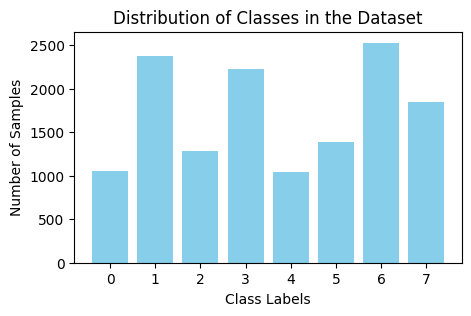

In [8]:
def load_data(dataset_address):
    data = np.load(dataset_address)
    X = data['images']
    y = data['labels']
    print(f"Loaded data - Images: {X.shape}, Labels: {y.shape} \n")
    return X, y
    
X, y = load_data(dataset_address)

def class_bar_chart(y):
  # Count the occurrences of each class in the labels
  unique_classes, class_counts = np.unique(y, return_counts=True)



  # Plot the bar chart
  plt.figure(figsize=(5, 3))
  plt.bar(unique_classes, class_counts, color='skyblue')
  plt.xlabel('Class Labels')
  plt.ylabel('Number of Samples')
  plt.title('Distribution of Classes in the Dataset')
  plt.xticks(unique_classes)  # Ensure class labels are shown on the x-axis
  plt.show()

class_bar_chart(y)

In [9]:
# Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

## Preprocessing

### Initial Inspection of the images

This function displays a grid of random images along with their labels for initial inspection.

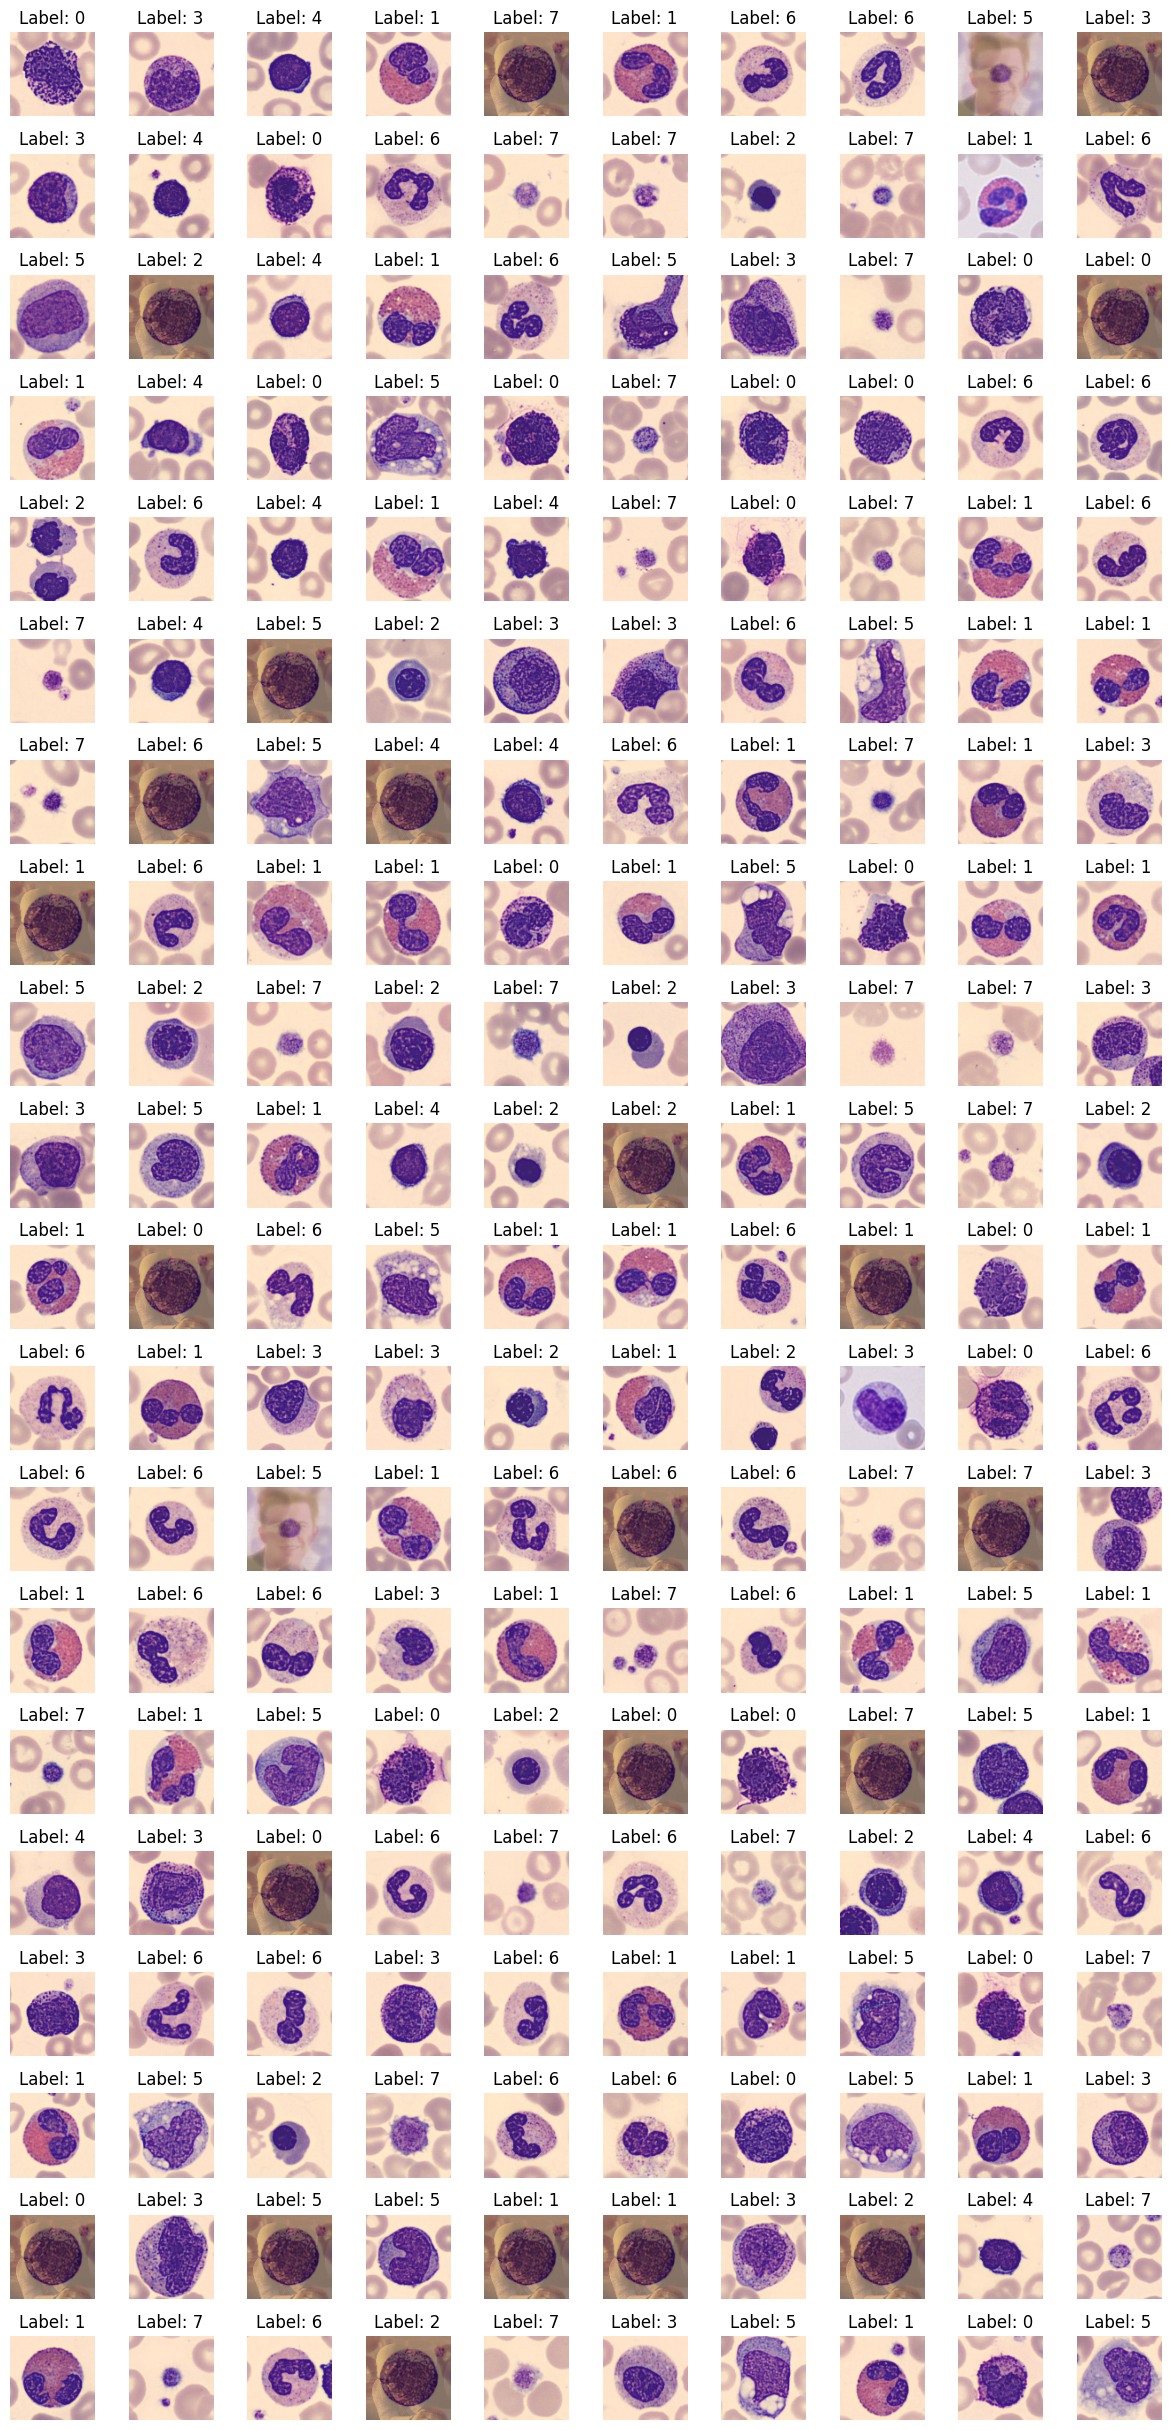

In [10]:
def display_random_images(images, labels, n, m):
    random_indices = np.random.choice(len(images), n * m, replace=False)
    fig, axes = plt.subplots(n, m, figsize=(m*1.2, n*1.22))
    axes = axes.flatten()
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(f"Label: {labels[idx][0]}")
        axes[i].axis('off') 
    plt.tight_layout()
    plt.show()

display_random_images(X, y, 20, 10)

### Removing duplicates

> compute_phash: Computes the perceptual hash of an image. <br>
> remove_duplicates: Removes duplicate images based on the perceptual hash to reduce redundancy.

Data after removing duplicates: (11959, 96, 96, 3) 



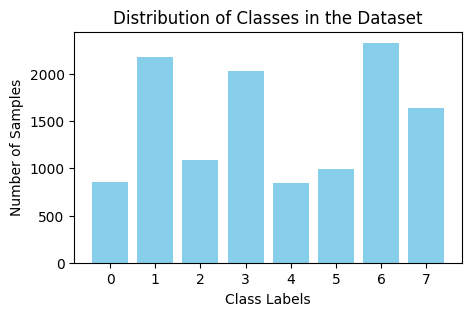

In [11]:
def compute_phash(image):
    pil_image = Image.fromarray(image)
    return imagehash.phash(pil_image)

def remove_duplicates(X, y):
    phash_dict = defaultdict(list)
    for idx, image in enumerate(X):
        image_phash = compute_phash(image)
        phash_dict[str(image_phash)].append(idx)

    to_remove = set()
    for indices in phash_dict.values():
        if len(indices) > 10:
            to_remove.update(indices)

    X_cleaned = np.delete(X, list(to_remove), axis=0)
    y_cleaned = np.delete(y, list(to_remove), axis=0)
    return X_cleaned, y_cleaned

X, y = remove_duplicates(X, y)
print(f"Data after removing duplicates: {X.shape} \n")

class_bar_chart(y)

So the data is imbalance!

## Checking for outliers

This code performs outlier detection using PCA for dimensionality reduction and k-NN to identify outliers.

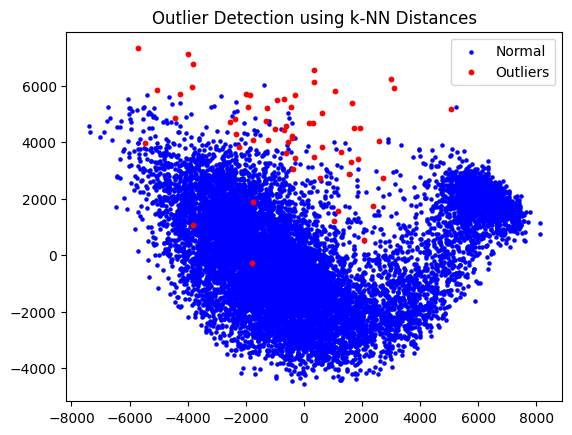

Detected outliers indices 
In Total: 60


In [12]:
# Flatten images for PCA
def flatten_images(images):
    flattened = [img.flatten() for img in images]
    return np.array(flattened)

# Flatten the images
flattened_images = flatten_images(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
pca_features = pca.fit_transform(flattened_images)

# k-NN based outlier detection
k = 150  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(pca_features)
distances, _ = nbrs.kneighbors(pca_features)

# Calculate the average distance to k neighbors
avg_distances = distances.mean(axis=1)

# Identify outliers: points with distance above a threshold
threshold = np.percentile(avg_distances, 99.5)
outliers = np.where(avg_distances > threshold)[0]

# Visualization
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue', s=5, label='Normal')
plt.scatter(pca_features[outliers, 0], pca_features[outliers, 1], c='red', s=10, label='Outliers')
plt.title('Outlier Detection using k-NN Distances')
plt.legend()
plt.show()

print(f"Detected outliers indices \nIn Total: {len(outliers)}")

Counts the number of outliers per class.

In [13]:
Counter(y[outliers].reshape(-1))

Counter({3: 17, 2: 12, 1: 10, 4: 7, 0: 6, 6: 5, 5: 3})

Displays a grid of random images after outlier removal.

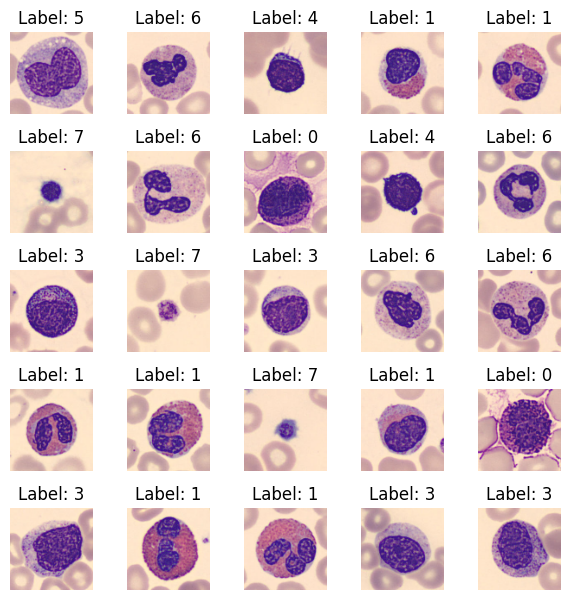

In [14]:
display_random_images(X, y, 5, 5)

### Plot random images

This function displays one random image per class.

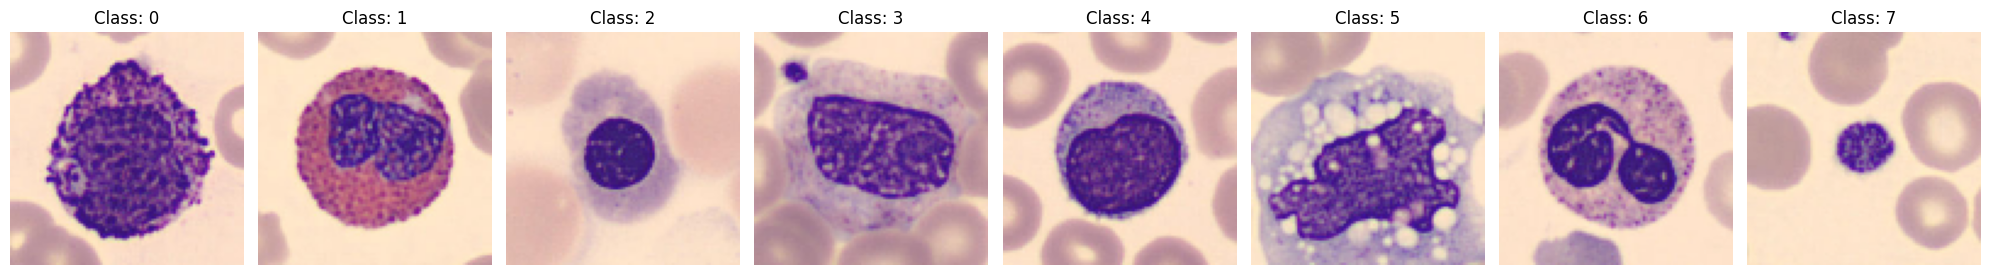

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images_one_per_class(images, labels, num_classes=8):
    plt.figure(figsize=(20, 5))
    plotted_classes = set()
    images_to_plot = []

    # Indices shuffled to pick random images
    shuffled_indices = np.random.permutation(len(images))

    # Find one random image for each class
    for i in shuffled_indices:
        label = labels[i][0]
        if label not in plotted_classes:
            images_to_plot.append((images[i], label))
            plotted_classes.add(label)
        if len(plotted_classes) == num_classes:
            break

    # Sort images by label to display them in order
    images_to_plot.sort(key=lambda x: x[1])

    # Plot images
    for idx, (img, lbl) in enumerate(images_to_plot):
        plt.subplot(1, num_classes, idx + 1)
        plt.imshow(img)
        plt.title(f"Class: {lbl}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function using your data
plot_random_images_one_per_class(X, y, num_classes=8)


### Split data

Splitting the data into training and validation sets while maintaining class distribution using stratification.


Class distribution in Train Set:


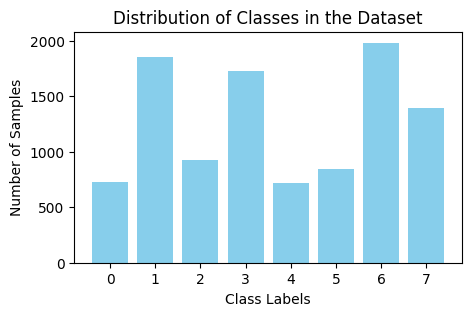


Class distribution in Validation Set:


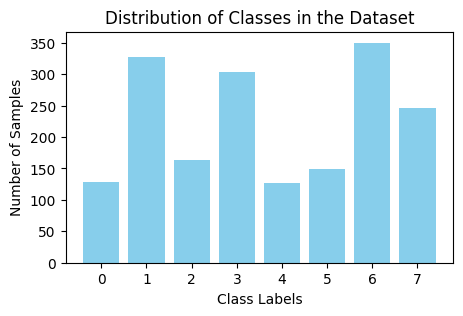

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)
print("\nClass distribution in Train Set:")
class_bar_chart(y_train)
print("\nClass distribution in Validation Set:")
class_bar_chart(y_val)

### Initial Augmentation (if needed)

In [17]:
# def augment_class(X_class, y_class, target_class, num_needed, datagen):
#     X_augmented, y_augmented = [], []
#     for X_batch, _ in datagen.flow(X_class, y_class, batch_size=32, shuffle=False):
#         X_augmented.append(X_batch)
#         y_augmented.extend([target_class] * len(X_batch))
#         if len(y_augmented) >= num_needed:
#             break

#     X_augmented = np.concatenate(X_augmented)[:num_needed]
#     y_augmented = np.array(y_augmented)[:num_needed]
#     return X_augmented, y_augmented

# def augment_data(X, y, target_count):

#     # Flatten y and convert to a list for Counter
#     y = np.ravel(y).tolist()

#     # Define the augmentation settings
#     datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,
#         brightness_range=[0.8, 1.2]
#     )

#     new_X_list, new_y_list = [], []

#     for target_class, count in Counter(y).items():
#         if count < target_count:
#             print(f"Augmenting class {target_class}...")
#             class_indices = np.where(np.array(y) == target_class)[0]
#             X_class = X[class_indices]
#             y_class = np.array(y)[class_indices]

#             num_needed = target_count - len(X_class)

#             # Generate augmented data
#             X_augmented, y_augmented = augment_class(X_class, y_class, target_class, num_needed, datagen)

#             # Append new data to lists
#             new_X_list.append(X_augmented)
#             new_y_list.append(y_augmented)

#     # If new data was generated, concatenate with the original dataset
#     if new_X_list:
#         X_new = np.concatenate(new_X_list, axis=0)
#         y_new = np.concatenate(new_y_list, axis=0)
#         X = np.concatenate([X, X_new], axis=0)
#         y = np.concatenate([y, y_new], axis=0)

#     return X, y

In [18]:
# X_train, y_train = augment_data(X_train, y_train, 1200)
# X_val, y_val = augment_data(X_val, y_val, 200)

# print("\nClass distribution in Train Set:")
# class_bar_chart(y_train)

# print("\nClass distribution in Validation Set:")
# class_bar_chart(y_val)

### Compute class weights fot training process

Computing class weights to handle class imbalance during training.

In [19]:
y_train_flat = y_train.flatten()
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.755006906077348, 1: 0.6853425026968716, 2: 1.3781182212581344, 3: 0.7378774680603949, 4: 1.7598684210526316, 5: 1.5054798578199051, 6: 0.641729797979798, 7: 0.9095382963493199}


### convert to categorical

Converting integer labels to one-hot encoded vectors.

In [20]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

### create a noisy version of validation data

Creating a noisy version of the validation set to test the model's robustness.

In [21]:
X_val_copy = np.copy(X_val)
def add_white_noise(images, noise_level=25):
    noise = np.random.normal(loc=0, scale=noise_level, size=images.shape).astype(np.uint8)
    noisy_images = np.clip(images + noise, 0, 255)
    return noisy_images
    
X_val_noisy = add_white_noise(X_val_copy)

## Training

### Augmentation functions through training

Defining various augmentation techniques like RandAugment, AugMix, MixUp, CutMix, and adding Gaussian noise to enhance the training dataset.

In [26]:
# Define RandAugment
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),
    augmentations_per_image=2,
    magnitude=0.5
)

# Define AugMix
augmix = keras_cv.layers.AugMix(
    value_range=(0, 255),
    severity=0.8,
    num_chains=3,
    alpha=1.0
)

def mixup(x1, y1, x2, y2, alpha=0.2):
    beta_dist = tfp.distributions.Beta(alpha, alpha)
    lam = beta_dist.sample()
    x1 = tf.cast(x1, tf.float32)
    x2 = tf.cast(x2, tf.float32)
    x_mix = lam * x1 + (1 - lam) * x2
    y_mix = lam * y1 + (1 - lam) * y2
    x_mix = tf.cast(x_mix, tf.uint8)
    return x_mix, y_mix

def cutmix(x1, y1, x2, y2, alpha=0.2):
    beta_dist = tfp.distributions.Beta(alpha, alpha)
    lam = beta_dist.sample()
    h = tf.cast(tf.shape(x1)[0], tf.float32)
    w = tf.cast(tf.shape(x1)[1], tf.float32)
    c = tf.shape(x1)[2]
    cut_ratio = tf.sqrt(1.0 - lam)
    cut_w = tf.cast(w * cut_ratio, tf.int32)
    cut_h = tf.cast(h * cut_ratio, tf.int32)
    cx = tf.random.uniform((), 0, tf.cast(w, tf.int32), dtype=tf.int32)
    cy = tf.random.uniform((), 0, tf.cast(h, tf.int32), dtype=tf.int32)
    bbx1 = tf.clip_by_value(cx - cut_w // 2, 0, tf.cast(w, tf.int32))
    bby1 = tf.clip_by_value(cy - cut_h // 2, 0, tf.cast(h, tf.int32))
    bbx2 = tf.clip_by_value(cx + cut_w // 2, 0, tf.cast(w, tf.int32))
    bby2 = tf.clip_by_value(cy + cut_h // 2, 0, tf.cast(h, tf.int32))
    
    # Create a mask for the cutout region
    mask = tf.zeros_like(x1, dtype=tf.float32)
    indices = tf.stack(tf.meshgrid(tf.range(bby1, bby2), tf.range(bbx1, bbx2), indexing='ij'), axis=-1)
    indices = tf.reshape(indices, (-1, 2))
    updates = tf.ones((tf.shape(indices)[0], c), dtype=tf.float32)
    mask = tf.tensor_scatter_nd_update(mask, indices, updates)
    x1 = tf.cast(x1, tf.float32)
    x2 = tf.cast(x2, tf.float32)
    
    # Combine x1 and x2 using the mask
    x1_updated = x1 * (1 - mask) + x2 * mask
    area = tf.cast((bbx2 - bbx1) * (bby2 - bby1), tf.float32)
    lam = 1 - area / (h * w)
    y_mix = lam * y1 + (1 - lam) * y2
    x1_updated = tf.cast(x1_updated, tf.uint8)
    return x1_updated, y_mix

def add_gaussian_noise(image, mean=0.0, stddev=0.1):
    noise = tf.random.normal(shape=tf.shape(image), mean=mean, stddev=stddev, dtype=tf.float32)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image to [0, 1]
    noisy_image = image + noise
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)  # Ensure values are in [0, 1]
    return tf.cast(noisy_image * 255.0, tf.uint8)  # Scale back to [0, 255]

# Function to apply augmentations
def apply_augmentation(data1, data2):
    image1, label1 = data1
    image2, label2 = data2
    # Apply RandAugment and AugMix to image1
    image1 = rand_augment(image1)
    image1 = augmix(image1)
    
    # Apply Gaussian noise 50% of times
    if np.random.rand() < 0.50:
        image1 = add_gaussian_noise(image1)
        
    # Decide whether to apply MixUp or CutMix
    p = tf.random.uniform([])
    alpha = 0.2
    def do_mixup():
        return mixup(image1, label1, image2, label2, alpha)
    def do_cutmix():
        return cutmix(image1, label1, image2, label2, alpha)
    image, label = tf.cond(p < 0.5, do_mixup, do_cutmix)
    return image, label

### Create dataset function

Creating a TensorFlow dataset with real-time data augmentation for efficient training.

In [23]:
def create_dataset(images, labels, batch_size):
    images_tensor = tf.convert_to_tensor(images, dtype=tf.uint8)
    labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)

    dataset1 = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    dataset1 = dataset1.shuffle(buffer_size=1000)

    dataset2 = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    dataset2 = dataset2.shuffle(buffer_size=1000)

    # Zip the datasets to create pairs
    dataset = tf.data.Dataset.zip((dataset1, dataset2))

    dataset = (dataset
               .shuffle(buffer_size=1000)
               .repeat()
               .map(apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
               .batch(batch_size)
               .prefetch(buffer_size=tf.data.AUTOTUNE))

    return dataset

### Model

> Building the model using EfficientNetB3 as the base model. <br>
> Adding custom layers on top for classification.<br>
> Applying L2 regularization to prevent overfitting.<br>
> Setting up callbacks for early stopping and learning rate reduction.

In [24]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
l2_value = 0.01
for layer in base_model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.Dense)):
        layer.kernel_regularizer = regularizers.l2(l2_value)
base_model.trainable = False

num_class = 8
# Model
inputs = Input(shape=(96, 96, 3))
x = Lambda(preprocess_input)(inputs)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_class, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Train the model with real-time augmentation
batch_size = 32
train_dataset = create_dataset(X_train, y_train, batch_size=batch_size)
# train_generator = AugmentedDataGenerator(X_train, y_train, batch_size=batch_size, augmentations=augmentations)

model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 3, 3, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,703,863 (44.65 MB)

 Trainable params: 920,328 (3.51 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

### Fit and save the model

Training the model for 10 epochs with class weights to handle imbalance.

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

Saving the initial trained model.

In [ ]:
model.save('weights_initial.keras')

Visualizing training progress over epochs.

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Loading the model for second phase of training

Loading the saved model for further fine-tuning.

In [ ]:
model = keras.models.load_model('/kaggle/working/weights_initial.keras', custom_objects={'preprocess_input': preprocess_input})

> Unfreezing the last few layers of EfficientNetB3 for fine-tuning. <br>
> Recompiling the model with a lower learning rate.

In [ ]:
efficientnet_model = None
for layer in model.layers:
    if 'efficientnetb3' in layer.name or isinstance(layer, tf.keras.Model):
        efficientnet_model = layer
        break

if efficientnet_model:
    # Freeze all layers first
    for layer in efficientnet_model.layers:
        layer.trainable = False

    num_layers_to_unfreeze = 20
    for layer in efficientnet_model.layers[-num_layers_to_unfreeze:]:
        layer.trainable = True

# Recompile the model after changing the trainable layers
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model.summary()

Fine-tuning the model with the unfrozen layers.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

Saving the final model.

In [ ]:
model.save('weights.keras')

Visualizing training progress after fine-tuning.

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluation

Defining a function to plot the confusion matrix for model evaluation.

In [ ]:
def plot_confusion_matrix(model, X_val, y_val, num_classes):
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

#### Using noisy validation data

Evaluating the model's performance on noisy validation data to test robustness.

In [ ]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val_noisy, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

y_pred = model.predict(X_val_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

#### Using normal validatoin data

Evaluating the model's performance on normal validation data.

In [ ]:
# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
# Get predictions and convert them to class labels
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

## Prepare the model.py file

Creating a model.py file that contains the class Model with methods for loading and predicting using the trained model.

In [ ]:
%%writefile model.py
import numpy as np
from tensorflow.keras import models as tfk_models
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

class Model:
    def __init__(self):
        """
        Initializes the internal state of the model.
        """
        # Load the pre-trained model from the weights file
        self.neural_network = tfk_models.load_model('weights.keras', custom_objects={'preprocess_input': preprocess_input})

    def predict(self, X):
        """
        Returns a numpy array of labels for the given input X.
        X is a numpy array of shape (n_samples, 96, 96, 3).
        The output should be a numpy array of shape (n_samples,)
        containing the predicted class labels.
        """
        # Get predictions from the model
        preds = self.neural_network.predict(X)
        # Convert softmax probabilities to class labels
        return np.argmax(preds, axis=1)

## Improving the model
After training the model, we can load it multiple times and keep unfreezing some layers from the end and start training again until we unfreeze the whole EfficientNet model.

Loading the pre-trained model and evaluating its performance.

In [27]:
model = keras.models.load_model('/kaggle/input/pre-trained/weights.keras', custom_objects={'preprocess_input': preprocess_input})
model.summary()
model.evaluate(X_val, y_val)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 3, 3, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,556,677 (116.56 MB)

 Trainable params: 9,426,406 (35.96 MB)

 Non-trainable params: 2,277,457 (8.69 MB)

 Optimizer params: 18,852,814 (71.92 MB)

57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.9887 - loss: 0.1415 - precision: 0.9892 - recall: 0.9887


[0.13998226821422577,
 0.9894091486930847,
 0.9899609684944153,
 0.9894091486930847]

Unfreezing more layers of EfficientNetB3 for further fine-tuning.

In [ ]:
efficientnet_model = None
for layer in model.layers:
    if 'efficientnetb3' in layer.name or isinstance(layer, tf.keras.Model):
        efficientnet_model = layer
        break

# If the EfficientNet model is found, unfreeze specific layers
if efficientnet_model:
    # Freeze all layers first
    for layer in efficientnet_model.layers:
        layer.trainable = False

    num_layers_to_unfreeze = 120
    for layer in efficientnet_model.layers[-num_layers_to_unfreeze:]:
        layer.trainable = True
#     for layer in efficientnet_model.layers:
#         layer.trainable = True


# Recompile the model after changing the trainable layers
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model.summary()

Training the model again with more layers unfrozen.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.7,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

Saving the updated model.

In [ ]:
model.save('weights.keras')

Visualizing the training progress.

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluation

#### Noisy validation data

Evaluating the model's performance on noisy validation data after further fine-tuning.

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8280 - loss: 0.6159 - precision: 0.8517 - recall: 0.8102
Validation Loss: 0.6062
Validation Accuracy: 0.8311
Validation Precision: 0.8555
Validation Recall: 0.8149
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.7305    0.9531    0.8271       128
           1     0.9778    0.9450    0.9611       327
           2     0.9492    0.3436    0.5045       163
           3     0.7060    0.8849    0.7854       304
           4     0.7444    0.7795    0.7615       127
           5     0.9524    0.4027    0.5660       149
           6     0.9121    0.9486    0.9300       350
           7     0.7846    0.9919    0.8761       246

    accuracy                         0.8311      1794
   macro avg     0.8446    0.7811    0.7765      1794
weighted avg     0.8536    0.8311    0.8156      1794



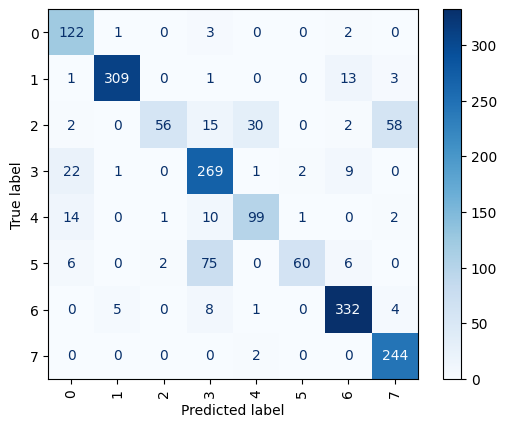

In [28]:
num_class = 8
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val_noisy, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

y_pred = model.predict(X_val_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

#### Normal validation data

Final evaluation on normal validation data.

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9887 - loss: 0.1415 - precision: 0.9892 - recall: 0.9887
Validation Loss: 0.1400
Validation Accuracy: 0.9894
Validation Precision: 0.9900
Validation Recall: 0.9894
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9846    1.0000    0.9922       128
           1     1.0000    0.9939    0.9969       327
           2     0.9939    1.0000    0.9969       163
           3     0.9770    0.9770    0.9770       304
           4     0.9845    1.0000    0.9922       127
           5     0.9733    0.9799    0.9766       149
           6     0.9913    0.9800    0.9856       350
           7     1.0000    1.0000    1.0000       246

    accuracy                         0.9894      1794
   macro avg     0.9881    0.9913    0.9897      1794
weighted avg     0.9894    0.9894    0.9894      1794



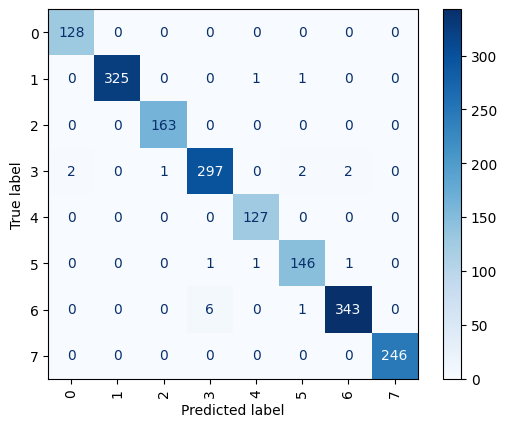

In [29]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()